In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


#Libraries

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import pandas as pd
import seaborn as sns
import re
import nltk
import json
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import regularizers
from tensorflow.keras.preprocessing.sequence import pad_sequences
from keras import models
from keras import layers
from tensorflow.keras.layers import LSTM,GRU
from tensorflow.keras.models import load_model
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report 
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score,roc_auc_score
from sklearn.metrics import average_precision_score,roc_auc_score, roc_curve, precision_recall_curve
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.preprocessing.text import Tokenizer
np.random.seed(42)
class color: # Text style
   PURPLE = '\033[95m'
   CYAN = '\033[96m'
   DARKCYAN = '\033[36m'
   BLUE = '\033[94m'
   GREEN = '\033[92m'
   YELLOW = '\033[93m'
   RED = '\033[91m'
   BOLD = '\033[1m'
   UNDERLINE = '\033[4m'
   END = '\033[0m'
# dataset path
path = '/content/drive/My Drive/Colab Notebooks/NLP Projects/News Headline Classification/'

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


#Data Preparation

Total number of headlines: 136811


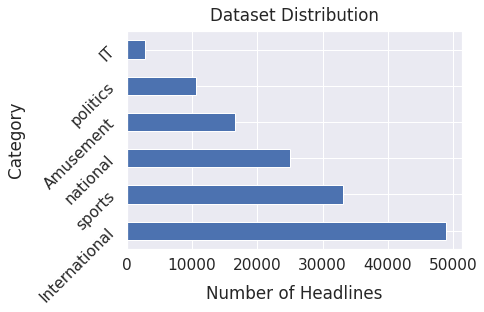

In [ ]:
data = pd.read_csv(path+'headlines.csv',encoding='utf-8')
print(f'Total number of headlines: {len(data)}')
sns.set(font_scale=1.4)
data['category'].value_counts().plot(kind='barh', figsize=(6, 4))
plt.xlabel("Number of Headlines", labelpad=12)
plt.ylabel("Category", labelpad=12)
plt.yticks(rotation = 45)
plt.title("Dataset Distribution", y=1.02);

In [ ]:
data.columns

Index(['headline', 'category', 'newspaper name'], dtype='object')

#Data Cleaning

In [ ]:
# Cleaning Data [Remove unncessary symbols]
def cleaning_data(row):
      headlines = re.sub('[^\u0980-\u09FF]',' ',str(row)) #removing unnecessary punctuation
      return headlines
# Apply the function into the dataframe
data['cleaned'] = data['headline'].apply(cleaning_data)  

# print some cleaned reviews from the dataset
sample_data = [2000,5000,10000,20000,30000,35000,40000,45000,50000,60000,65000,70000,75000,80000,100000]
for i in sample_data:
  print('Original:\n',data.headline[i],'\nCleaned:\n',
           data.cleaned[i],'\n','Category':-- ',data.category[i],'\n')   

Original:
 ক্ষমা চেয়েও মুক্তি পেলেন না পরিচালক গাজী মাহবুব 
Cleaned:
 ক্ষমা চেয়েও মুক্তি পেলেন না পরিচালক গাজী মাহবুব 
 Sentiment:--  Amusement 

Original:
 ব্র্যান্ডউইথের ব্যবহার ৮০০ জিবিপিএস ছাড়িয়ে 
Cleaned:
 ব্র্যান্ডউইথের ব্যবহার ৮০০ জিবিপিএস ছাড়িয়ে 
 Sentiment:--  IT 

Original:
 জামিনে মুক্তি পেলেন ছাত্রদল সভাপতি 
Cleaned:
 জামিনে মুক্তি পেলেন ছাত্রদল সভাপতি 
 Sentiment:--  politics 

Original:
 দ. কোরিয়ায় ১০০টি খালি কফিন পাঠিয়েছে যুক্তরাষ্ট্র 
Cleaned:
 দ  কোরিয়ায় ১০০টি খালি কফিন পাঠিয়েছে যুক্তরাষ্ট্র 
 Sentiment:--  International 

Original:
 ফ্লোরিডায় হামলাকারী ‘মানসিকভাবে অসুস্থ’: ট্রাম্প 
Cleaned:
 ফ্লোরিডায় হামলাকারী  মানসিকভাবে অসুস্থ   ট্রাম্প 
 Sentiment:--  International 

Original:
 সেরাটা দিতে পারলে সিরিজ জিতবে বাংলাদেশ: মাশরাফি 
Cleaned:
 সেরাটা দিতে পারলে সিরিজ জিতবে বাংলাদেশ  মাশরাফি 
 Sentiment:--  sports 

Original:
 সাকিব ফেরালেন শাই হোপকে 
Cleaned:
 সাকিব ফেরালেন শাই হোপকে 
 Sentiment:--  sports 

Original:
 কংগ্রেস সভাপতির পদ থেকে রাহুল গান্ধীর পদত্যাগ 
Cleane

#Remove Low Lenght Data

In [ ]:
# Length of each Reveiws
data['length'] = data['cleaned'].apply(lambda x:len(x.split()))
# Remove the reviews with least words
dataset = data.loc[data.length>2]
dataset = dataset.reset_index(drop = True)
print("After Cleaning:","\nRemoved {} Small Headlines".format(len(data)-len(dataset)),
      "\nTotal Reviews:",len(dataset))

After Cleaning: 
Removed 4098 Small Headlines 
Total Reviews: 132713


#Dataset Analysis

In [ ]:
def data_summary(dataset):
    
    """
    This function will print the summary of the reviews and words distribution in the dataset. 
    
    Args:
        dataset: list of cleaned sentences   
        
    Returns:
        Number of documnets per class: int 
        Number of words per class: int
        Number of unique words per class: int
    """
    documents = []
    words = []
    u_words = []
    total_u_words = [word.strip().lower() for t in list(dataset.cleaned) for word in t.strip().split()]
    class_label= [k for k,v in dataset.category.value_counts().to_dict().items()]
  # find word list
    for label in class_label: 
        word_list = [word.strip().lower() for t in list(dataset[dataset.category==label].cleaned) for word in t.strip().split()]
        counts = dict()
        for word in word_list:
                counts[word] = counts.get(word, 0)+1
        # sort the dictionary of word list  
        ordered = sorted(counts.items(), key= lambda item: item[1],reverse = True)
        # Documents per class
        documents.append(len(list(dataset[dataset.category==label].cleaned)))
        # Total Word per class
        words.append(len(word_list))
        # Unique words per class 
        u_words.append(len(np.unique(word_list)))
       
        print("\nClass Name : ",label)
        print("Number of Documents:{}".format(len(list(dataset[dataset.category==label].cleaned))))  
        print("Number of Words:{}".format(len(word_list))) 
        print("Number of Unique Words:{}".format(len(np.unique(word_list)))) 
        print("Most Frequent Words:\n")
        for k,v in ordered[:10]:
              print("{}\t{}".format(k,v))
    print("Total Number of Unique Words:{}".format(len(np.unique(total_u_words))))           
   
    return documents,words,u_words,class_label

#call the fucntion
documents,words,u_words,class_names = data_summary(dataset)    



Class Name :  International
Number of Documents:47885
Number of Words:307354
Number of Unique Words:28710
Most Frequent Words:

নিহত	3398
না	2133
নিয়ে	1634
ট্রাম্প	1472
মার্কিন	1434
ও	1342
থেকে	1332
ভারতের	1212
যুক্তরাষ্ট্র	1208
ভারত	1192

Class Name :  sports
Number of Documents:30831
Number of Words:152852
Number of Unique Words:18581
Most Frequent Words:

বাংলাদেশ	1581
না	1122
জয়	883
বাংলাদেশের	873
শুরু	782
নিয়ে	689
সাকিব	672
ভারত	619
শেষ	603
দল	573

Class Name :  national
Number of Documents:24557
Number of Words:158042
Number of Unique Words:20710
Most Frequent Words:

না	1444
হবে	1292
ও	1215
প্রধানমন্ত্রী	1003
আজ	752
থেকে	617
কাদের	613
খালেদা	566
বিএনপি	557
নিয়ে	556

Class Name :  Amusement
Number of Documents:16067
Number of Words:98582
Number of Unique Words:16622
Most Frequent Words:

নতুন	1158
নিয়ে	1074
ও	1003
গান	683
ভিডিও	517
না	484
নাটক	469
খান	461
চলচ্চিত্র	416
আজ	412

Class Name :  politics
Number of Documents:10577
Number of Words:75657
Number of Unique Words:10398
Mos

#Summary Visualization

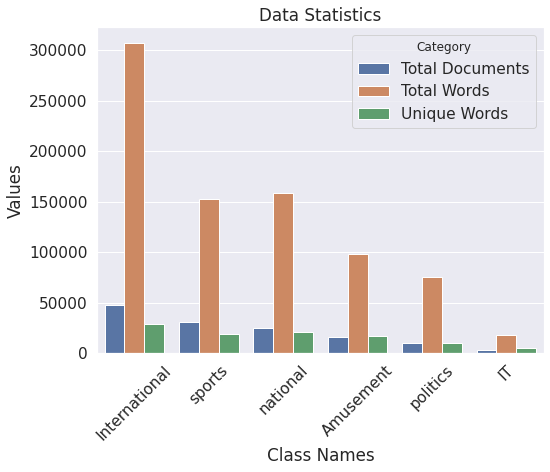

In [ ]:
data_matrix = pd.DataFrame({'Total Documents':documents,
                            'Total Words':words,
                            'Unique Words':u_words,
                            'Class Names':class_names})
df = pd.melt(data_matrix, id_vars="Class Names", var_name="Category", value_name="Values")
plt.figure(figsize=(8, 6))
ax = plt.subplot()

sns.barplot(data=df,x='Class Names', y='Values' ,hue='Category')
ax.set_xlabel('Class Names') 
ax.set_title('Data Statistics')

ax.xaxis.set_ticklabels(class_names, rotation=45);

#Headline Length Distribution

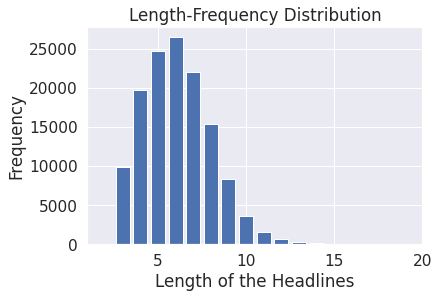

Maximum Length of a headline: 21
Minimum Length of a headline: 3
Average Length of a headline: 6.0


In [ ]:
# Calculate the Review of each of the Review
dataset['ReviewLength'] = dataset.cleaned.apply(lambda x:len(x.split()))
frequency = dict()
for i in dataset.ReviewLength:
    frequency[i] = frequency.get(i, 0)+1

plt.bar(frequency.keys(), frequency.values(), color ="b")
plt.xlim(1, 20)
# in this notbook color is not working but it should work.
plt.xlabel('Length of the Headlines')
plt.ylabel('Frequency')
plt.title('Length-Frequency Distribution')
plt.show()  
print(f"Maximum Length of a headline: {max(dataset.ReviewLength)}")
print(f"Minimum Length of a headline: {min(dataset.ReviewLength)}")
print(f"Average Length of a headline: {round(np.mean(dataset.ReviewLength),0)}")

#Lable Encoding and Dataset Splitting

In [ ]:
                                      #==================================================
                                       ################# Label Encoding Function #########
                                       #==================================================

def label_encoding(category,bool):
    """
    This function will return the encoded labels in array format. 
    
    Args:
        category: series of class names(str)
        bool: boolean (True or False)
        
    Returns:
        labels: numpy array 
    """
    le = LabelEncoder()
    le.fit(category)
    encoded_labels = le.transform(category)
    labels = np.array(encoded_labels) # Converting into numpy array
    class_names =le.classes_ ## Define the class names again
    if bool == True:
        print("\n\t\t\t===== Label Encoding =====","\nClass Names:-->",le.classes_)
        for i in sample_data:
            print(category[i],' ', encoded_labels[i],'\n')

    return labels



                           #===========================================================
                           ################# Dataset Splitting Function ###############
                           #=========================================================== 

def dataset_split(headlines,category):
    """
    This function will return the splitted (90%-10%-10%) feature vector . 
    
    Args:
        headlines: sequenced headlines 
        category: encoded lables (array) 
        
    Returns:
        X_train: training data 
        X_valid: validation data
        X_test : testing feature vector 
        y_train: training encoded labels (array) 
        y_valid: training encoded labels (array) 
        y_test : testing encoded labels (array) 
    """

    X,X_test,y,y_test = train_test_split(headlines,category,train_size = 0.9,
                                                  test_size = 0.1,random_state =0)
    X_train,X_valid,y_train,y_valid = train_test_split(X,y,train_size = 0.8,
                                                  test_size = 0.2,random_state =0)
    print(color.BOLD+"\nDataset Distribution:\n"+color.END)
    print("\tSet Name","\t\tSize")
    print("\t========\t\t======")

    print("\tFull\t\t\t",len(headlines),
        "\n\tTraining\t\t",len(X_train),
        "\n\tTest\t\t\t",len(X_test),
        "\n\tValidation\t\t",len(X_valid))
  
    return X_train,X_valid,X_test,y_train,y_valid,y_test


In [ ]:
labels = label_encoding(dataset.category,True)


			===== Label Encoding ===== 
Class Names:--> ['Amusement' 'IT' 'International' 'national' 'politics' 'sports']
Amusement   0 

IT   1 

politics   4 

International   2 

International   2 

sports   5 

sports   5 

International   2 

national   3 

International   2 

International   2 

International   2 

International   2 

International   2 

Amusement   0 



In [ ]:
X_train,X_valid,X_test,y_train,y_valid,y_test = dataset_split(dataset.headline,labels)


Dataset Distribution:

	Set Name 		Size
	========		======
	Full			 132713 
	Training		 95552 
	Test			 13272 
	Validation		 23889


#Tokenization

In [ ]:
vocab_size = 57000
embedding_dim = 64
max_length = 21
trunc_type='post'
padding_type='post'
oov_tok = "<OOV>"

def padded_headlines(original,encoded,padded):
  '''
  print the samples padded headlines
  '''
  print(color.BOLD+"\n\t\t\t====== Encoded Sequences ======"+color.END,"\n")  
  print(original,"\n",encoded) 
  print(color.BOLD+"\n\t\t\t====== Paded Sequences ======\n"+color.END,original,"\n",padded)  

In [ ]:
# Train Data Tokenization
tokenizer = Tokenizer(num_words = vocab_size, oov_token=oov_tok)
tokenizer.fit_on_texts(X_train)
word_index = tokenizer.word_index
train_sequences = tokenizer.texts_to_sequences(X_train)
train_padded = pad_sequences(train_sequences, padding=padding_type, maxlen=max_length)


In [ ]:
 #============================== Tokenizer Info =================================
(word_counts,word_docs,word_index,document_count) = (tokenizer.word_counts,
                                                       tokenizer.word_docs,
                                                       tokenizer.word_index,
                                                       tokenizer.document_count)
def tokenizer_info(mylist,bool):
  ordered = sorted(mylist.items(), key= lambda item: item[1],reverse = bool)
  for w,c in ordered[:10]:
    print(w,"\t",c)
  #=============================== Print all the information =========================
print(color.BOLD+"\t\t\t====== Tokenizer Info ======"+color.END)   
print("Words --> Counts:")
tokenizer_info(word_counts,bool =True )
print("\nWords --> Documents:")
tokenizer_info(word_docs,bool =True )
print("\nWords --> Index:")
tokenizer_info(word_index,bool =True )    
print("\nTotal Documents -->",document_count)
print(f"Found {len(word_index)} unique tokens")

			====== Tokenizer Info ======
Words --> Counts:
না 	 4125
নিয়ে 	 3213
ও 	 3201
নিহত 	 2683
নতুন 	 2288
হবে 	 2193
থেকে 	 2165
বাংলাদেশ 	 1741
সঙ্গে 	 1692
করে 	 1510

Words --> Documents:
না 	 4031
নিয়ে 	 3204
ও 	 3173
নিহত 	 2681
নতুন 	 2273
হবে 	 2182
থেকে 	 2162
বাংলাদেশ 	 1737
সঙ্গে 	 1684
করে 	 1499

Words --> Index:
মিসিসিপিতে 	 55055
ইয়ামেনি 	 55054
ওকিনাওয়ায় 	 55053
শনাক্তকরণের 	 55052
আবিষ্কৃত 	 55051
বেলজীয় 	 55050
পুজদেমনকে 	 55049
‘গান’ 	 55048
বেস 	 55047
ইনস্ট্রুমেন্টাল 	 55046

Total Documents --> 95552
Found 55055 unique tokens


In [ ]:
padded_headlines(X_train[10],train_sequences[10],train_padded[10]) 


			====== Encoded Sequences ====== 

মোদির পাশে তৈমুর! 
 [4172, 2216, 6238, 301, 2629, 5925]

			====== Paded Sequences ======
 মোদির পাশে তৈমুর! 
 [4172 2216 6238  301 2629 5925    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0]


In [ ]:
# Validation Data Tokenization
validation_sequences = tokenizer.texts_to_sequences(X_valid)
validation_padded = pad_sequences(validation_sequences, padding=padding_type , maxlen=max_length)
padded_headlines(X_valid[61569],validation_sequences[1],validation_padded[1]) 



			====== Encoded Sequences ====== 

জেলবন্দি তামিলদের মুক্তি দিতে পারেন রাজাপক্ষে 
 [1, 1410, 161, 18585, 4123, 2124, 2521, 2, 851]

			====== Paded Sequences ======
 জেলবন্দি তামিলদের মুক্তি দিতে পারেন রাজাপক্ষে 
 [    1  1410   161 18585  4123  2124  2521     2   851     0     0     0
     0     0     0     0     0     0     0     0     0]


In [ ]:
# Test Data Tokenization
test_sequences = tokenizer.texts_to_sequences(X_test)
test_padded = pad_sequences(test_sequences, padding=padding_type , maxlen=max_length)
padded_headlines(X_test[100],test_sequences[100],test_padded[100]) 


			====== Encoded Sequences ====== 

দেখতে পারেন শ্রীদেবীর সেরা ৪ ছবি (ভিডিও) 
 [822, 466, 778, 54443]

			====== Paded Sequences ======
 দেখতে পারেন শ্রীদেবীর সেরা ৪ ছবি (ভিডিও) 
 [  822   466   778 54443     0     0     0     0     0     0     0     0
     0     0     0     0     0     0     0     0     0]


In [ ]:
# Labels Tokenization
#label_tokenizer = Tokenizer()
#label_tokenizer.fit_on_texts(dataset.category)

train_label_seq = y_train
valid_label_seq = y_valid
testing_label_seq = y_test

#print(train_label_seq.shape)
#print(valid_label_seq.shape)
#print(testing_label_seq.shape)

#Model Defination

In [ ]:
keras.backend.clear_session()
accuracy_threshold = 0.97
vocab_size = 57000
embedding_dim = 64
max_length = 21
num_category = 6

class myCallback(keras.callbacks.Callback):
  def on_epoch_end(self, epoch, logs={}):
      if(logs.get('accuracy')>accuracy_threshold):
        print("\nReached %2.2f%% accuracy so we will stop trianing" % (accuracy_threshold*100))
        self.model.stop_training = True

acc_callback = myCallback()
# Saved the Best Model
filepath = path+"Model.h5"
checkpoint = keras.callbacks.ModelCheckpoint(filepath, monitor='val_accuracy', verbose=2, save_best_only=True, 
                                             save_weights_only=False, mode='max')
callback_list = [acc_callback, checkpoint] 
model = tf.keras.Sequential([
    tf.keras.layers.Embedding(vocab_size, embedding_dim, input_length=max_length),
    tf.keras.layers.Bidirectional(GRU(64,dropout=0.2)),
    tf.keras.layers.Dense(24, activation='relu'),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(num_category, activation='softmax')
])
model.compile(loss='sparse_categorical_crossentropy',optimizer='adam',metrics=['accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, 21, 64)            3648000   
_________________________________________________________________
bidirectional (Bidirectional (None, 128)               49920     
_________________________________________________________________
dense (Dense)                (None, 24)                3096      
_________________________________________________________________
flatten (Flatten)            (None, 24)                0         
_________________________________________________________________
dense_1 (Dense)              (None, 6)                 150       
Total params: 3,701,166
Trainable params: 3,701,166
Non-trainable params: 0
_________________________________________________________________


In [ ]:
num_epochs = 10
batch = 64
history = model.fit(train_padded, train_label_seq, 
                    epochs=num_epochs,
                    batch_size = batch,
                    validation_data=(validation_padded, valid_label_seq), 
                    verbose=1,
                    callbacks = callback_list)

Epoch 1/10
1493/1493 [==============================] - ETA: 0s - loss: 0.6987 - accuracy: 0.7449
Epoch 00001: val_accuracy improved from -inf to 0.82574, saving model to /content/drive/My Drive/Colab Notebooks/NLP Projects/News Headline Classification/Model.h5
1493/1493 [==============================] - 52s 35ms/step - loss: 0.6987 - accuracy: 0.7449 - val_loss: 0.4903 - val_accuracy: 0.8257
Epoch 2/10
1492/1493 [============================>.] - ETA: 0s - loss: 0.3350 - accuracy: 0.8804
Epoch 00002: val_accuracy improved from 0.82574 to 0.83771, saving model to /content/drive/My Drive/Colab Notebooks/NLP Projects/News Headline Classification/Model.h5
1493/1493 [==============================] - 55s 37ms/step - loss: 0.3350 - accuracy: 0.8804 - val_loss: 0.4596 - val_accuracy: 0.8377
Epoch 3/10
1493/1493 [==============================] - ETA: 0s - loss: 0.2152 - accuracy: 0.9235
Epoch 00003: val_accuracy did not improve from 0.83771
1493/1493 [==============================] - 55s 3

##Confusion Matrix

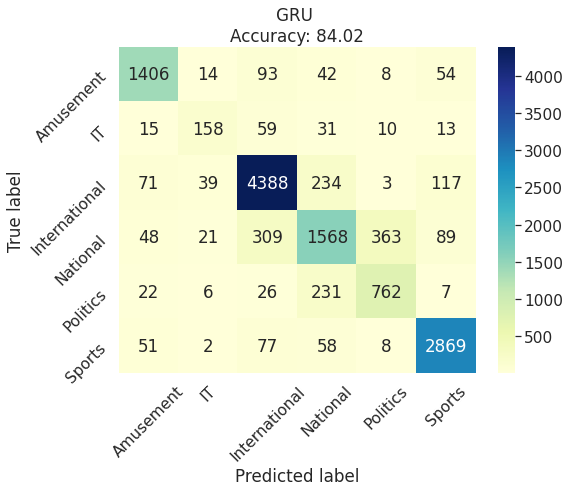

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix
# load the Saved model from directory
model = load_model(path+"Model.h5")
predictions = model.predict(test_padded)
y_pred = np.argmax(predictions, axis=1)

cm = confusion_matrix(testing_label_seq, y_pred) 

# Transform to df for easier plotting
cm_df = pd.DataFrame(cm,
                     
                     index = ['Amusement' ,'IT' ,'International', 'National', 'Politics', 'Sports'], 
                     columns = ['Amusement' ,'IT' ,'International', 'National', 'Politics', 'Sports'])

plt.figure(figsize=(8,6))
sns.heatmap(cm_df, annot=True,cmap="YlGnBu", fmt='g')
plt.title('GRU \nAccuracy: {0:.2f}'.format(accuracy_score(testing_label_seq, y_pred)*100))
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.xticks(rotation = 45)
plt.yticks(rotation = 45)
plt.show()

In [ ]:
report = pd.DataFrame(classification_report(y_true = testing_label_seq, y_pred = y_pred, output_dict=True)).transpose()
report = report.rename(index={'0': 'Amusement','1':'IT','2':'International','3':'National','4':'Politics','5':'Sports'})
report[['precision','recall','f1-score']]=report[['precision','recall','f1-score']].apply(lambda x: round(x*100,2))
report

,precision,recall,f1-score,support
Amusement,87.17,86.95,87.06,1617.00000
IT,65.83,55.24,60.08,286.00000
International,88.61,90.44,89.51,4852.00000
National,72.46,65.39,68.74,2398.00000
Politics,66.03,72.30,69.02,1054.00000
Sports,91.11,93.61,92.34,3065.00000
accuracy,84.02,84.02,84.02,0.84019
macro avg,78.53,77.32,77.79,13272.00000
weighted avg,83.81,84.02,83.85,13272.00000
